In [4]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [5]:
data = pd.read_csv("data/Admission_Predict_Ver1.1.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.shape

(500, 9)

In [9]:
data.loc[data['Chance of Admit '] < 0.65, 'isAdmit'] = 0
data.loc[data['Chance of Admit '] >= 0.65, 'isAdmit'] = 1
data.isAdmit

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    1.0
496    1.0
497    1.0
498    1.0
499    1.0
Name: isAdmit, Length: 500, dtype: float64

In [10]:
np.unique(data.isAdmit)

array([0., 1.])

In [11]:
target = data.iloc[:, -1]
new_data = data.iloc[:, :-2]

new_data.shape, target.shape

((500, 8), (500,))

In [12]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    new_data, target, test_size=0.6, random_state=1
)

In [13]:
data_X_train.shape, data_X_test.shape, data_y_train.shape, data_y_test.shape

((200, 8), (300, 8), (200,), (300,))

In [14]:
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(data_X_train, data_y_train)
target1_0 = cl1_1.predict(data_X_train)
target1_1 = cl1_1.predict(data_X_test)
accuracy_score(data_y_train, target1_0), accuracy_score(data_y_test, target1_1)

(0.79, 0.6533333333333333)

In [15]:
cl1_2 = KNeighborsClassifier(n_neighbors=15)
cl1_2.fit(data_X_train, data_y_train)
target2_0 = cl1_2.predict(data_X_train)
target2_1 = cl1_2.predict(data_X_test)
accuracy_score(data_y_train, target2_0), accuracy_score(data_y_test, target2_1)

(0.83, 0.6966666666666667)

In [16]:
cl1_3 = KNeighborsClassifier(n_neighbors=3)
cl1_3.fit(data_X_train, data_y_train)
target3_0 = cl1_3.predict(data_X_train)
target3_1 = cl1_3.predict(data_X_test)
accuracy_score(data_y_train, target3_0), accuracy_score(data_y_test, target3_1)

(0.925, 0.82)

In [17]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=5)
scores1, np.mean(scores1)

(array([0.35, 0.52, 0.71, 0.6 , 0.77]), 0.5900000000000001)

In [18]:
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=5, scoring='jaccard')
scores2, np.mean(scores2)

(array([0.08450704, 0.52      , 0.71      , 0.43661972, 0.69333333]),
 0.4888920187793427)

In [19]:
scores3 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=3, scoring='f1')
scores3, np.mean(scores3)

(array([0.31428571, 0.83985765, 0.12698413]), 0.427042497505131)

In [20]:
scoring = {
    'accuracy': 'accuracy',
    'jaccard': 'jaccard',
    'f1': 'f1'
}

scores = cross_validate(KNeighborsClassifier(n_neighbors=15), 
                        new_data, target, scoring=scoring, 
                        cv=5, return_train_score=True)
scores

{'fit_time': array([0.00699782, 0.00499678, 0.00399804, 0.00399756, 0.00499845]),
 'score_time': array([0.01299381, 0.0109942 , 0.00799537, 0.00799584, 0.00799394]),
 'test_accuracy': array([0.35, 0.52, 0.71, 0.6 , 0.77]),
 'train_accuracy': array([0.865 , 0.8625, 0.8975, 0.855 , 0.8625]),
 'test_jaccard': array([0.08450704, 0.52      , 0.71      , 0.43661972, 0.69333333]),
 'train_jaccard': array([0.83685801, 0.83333333, 0.86900958, 0.82477341, 0.83333333]),
 'test_f1': array([0.15584416, 0.68421053, 0.83040936, 0.60784314, 0.81889764]),
 'train_f1': array([0.91118421, 0.90909091, 0.92991453, 0.90397351, 0.90909091])}

In [21]:
%%time
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=LeaveOneOut())
scores, np.mean(scores)

Wall time: 3.89 s


(array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [22]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         new_data, target, 
                         cv=kf)
scores

array([0.76, 0.77, 0.81, 0.62, 0.74])

In [23]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [24]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(data_X_train, data_y_train)

Wall time: 503 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [25]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00539775, 0.00439777, 0.00360117, 0.00439715, 0.00319815,
        0.00319843, 0.00399475, 0.00579686, 0.00499306, 0.00459676]),
 'std_fit_time': array([0.00048992, 0.00101884, 0.00048532, 0.00135525, 0.00039971,
        0.00040043, 0.00062511, 0.0020421 , 0.00063718, 0.00079986]),
 'mean_score_time': array([0.00659523, 0.00419726, 0.00499401, 0.00479727, 0.0043973 ,
        0.00400066, 0.00439377, 0.00579667, 0.00620103, 0.0057972 ]),
 'std_score_time': array([1.01912224e-03, 4.00114443e-04, 6.31988295e-04, 1.16610586e-03,
        4.89375878e-04, 7.27704123e-06, 5.00204961e-04, 9.79326166e-04,
        7.52164723e-04, 1.16565645e-03]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [26]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [27]:
clf_gs.best_score_

0.8100000000000002

In [28]:
clf_gs.best_params_

{'n_neighbors': 10}

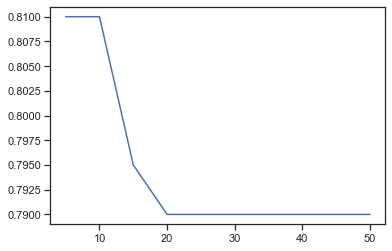

In [29]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\ncher\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

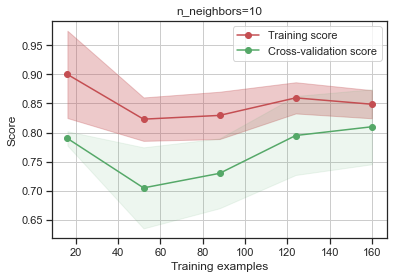

In [31]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    data_X_train, data_y_train, cv=5)

In [32]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\ncher\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

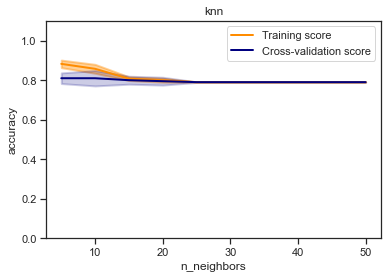

In [33]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      data_X_train, data_y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=3, scoring="accuracy")